In [1]:
from pandas_datareader import data as pdr
# pip install pandas-datareader
import quandl
# pip install quandl
from googlefinance import getQuotes
# pip install googlefinance
import json

import winsound # 5555555555555555555555555555555555555555555555555555555555

In [2]:
# Data
StockName = 'PTT'
startDate = '2003-1-1'
endDate = '2021-1-1'

In [3]:
def QueryStockIndex(name, startDate, endDate):
    data = pdr.get_data_yahoo(name, start=startDate, end=endDate)
    return data

In [4]:
stock = QueryStockIndex(StockName + '.BK', startDate, endDate)
print(stock)

              High     Low    Open   Close      Volume  Adj Close
Date                                                             
2003-01-01   4.225   4.225   4.225   4.225         0.0   2.034884
2003-01-02   4.300   4.225   4.225   4.250  18449000.0   2.046925
2003-01-03   4.275   4.225   4.250   4.225  15724000.0   2.034884
2003-01-06   4.250   4.225   4.250   4.250  11980000.0   2.046925
2003-01-07   4.275   4.250   4.250   4.275  22059000.0   2.058966
...            ...     ...     ...     ...         ...        ...
2020-12-24  41.500  40.750  40.750  41.250  45405500.0  40.424999
2020-12-25  42.250  41.250  41.250  42.000  32414000.0  41.160000
2020-12-28  42.750  41.000  42.250  41.000  60698100.0  40.180000
2020-12-29  42.500  41.000  41.250  42.500  41046600.0  41.650002
2020-12-30  43.250  42.250  43.250  42.500  67293300.0  41.650002

[4450 rows x 6 columns]


In [5]:
def QueryOilPrice(startDate, endDate):
    quandl.ApiConfig.api_key = "RgFSGT7KyM8eqQzDgers"
    OilPrice = quandl.get("OPEC/ORB", start_date=startDate, end_date=endDate)
    return OilPrice

In [6]:
OPEC = QueryOilPrice(startDate, endDate)
print(OPEC)

            Value
Date             
2003-01-02  30.05
2003-01-03  30.83
2003-01-06  30.71
2003-01-07  29.72
2003-01-08  28.86
...           ...
2020-12-24  50.31
2020-12-28  50.10
2020-12-29  50.16
2020-12-30  50.22
2020-12-31  50.24

[4643 rows x 1 columns]


In [57]:
# write stock data to list
indexStock = []
dataStock = []
closeStock = []
for index, row in stock.iterrows():
    
    date = str(index)[:10]
    indexStock.append(date)
    
    temp = []
    temp.append(row.High)
    temp.append(row.Low)
    temp.append(row.Open)
    temp.append(row.Close)
    temp.append(row.Volume)
    dataStock.append(temp)

    closeStock.append(row.Close)

In [58]:
# write OPEC to list
indexOil = []
dataOil = []
for index, row in OPEC.iterrows():
    date = str(index)[:10]
    indexOil.append(date)

    dataOil.append(row.Value)

In [95]:
# Split date
dateTest = '2020-01' # 2020-06 or 2020-01

In [96]:
# cleaning data
TrainStock = []
TrainOil = []
TestStock = []
TestOil = []
testflag = False
for i in indexStock:
    for j in indexOil:
        if(i[:7] == dateTest):
            testflag = True
        
        if (i == j) and not(testflag):
            TrainStock.append(dataStock[indexStock.index(i)])
            TrainOil.append(dataOil[indexOil.index(j)])
        elif (i==j) and testflag:
            TestStock.append(dataStock[indexStock.index(i)])
            TestOil.append(dataOil[indexStock.index(i)])

In [97]:
print('Train = ' + str(len(TrainStock)) + ' (' + str(len(TrainStock)/(len(TrainStock)+len(TestStock))) + ')')
print('Test = ' + str(len(TestStock)) + ' (' + str(len(TestStock)/(len(TrainStock)+len(TestStock))) + ')')

Train = 3806 (0.9645210339584389)
Test = 140 (0.035478966041561075)


In [98]:
# Data split
n_stock, n_oil = 1, 1

rangeDate = n_stock
if n_oil > n_stock:
    rangeDate = n_oil

# Train
X_train = []
y_train = []
for i in range(len(TrainStock)-rangeDate):
    temp = []
    for s in range(n_stock):
        for j in range(5):
            temp.append(TrainStock[i+s][j])
    for o in range(n_oil):
        temp.append(TrainOil[i+o])
    X_train.append(temp)
    y_train.append(TrainStock[i+rangeDate][3])

# Test
X_test = []
y_test = []
for i in range(len(TestStock)-rangeDate):
    temp = []
    for s in range(n_stock):
        for j in range(5):
            temp.append(TestStock[i+s][j])
    for o in range(n_oil):
        temp.append(TestOil[i+o])
    X_test.append(temp)
    y_test.append(TestStock[i+rangeDate][3])

In [99]:
# import
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib  # save model

In [16]:
# SVR model define
C = np.arange(1, 20, 1).tolist()
epsilon = np.arange(0.05, 1, 0.05).tolist()

bestScore = 0
C_Best = 0
epsilon_Best = 0
for tempC in C:
    for tempEpsilon in epsilon:
        regr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=tempC, epsilon=tempEpsilon))
        regr.fit(X_train,y_train)

        print("C : " + str(tempC) + "\t epsilon : " + str(tempEpsilon) + "\t R^2 : " + str(regr.score(X_train, y_train)))
        print(bestScore)

        if regr.score(X_train, y_train) > bestScore:
            bestScore = regr.score(X_train, y_train)
            C_Best = tempC
            epsilon_Best = tempEpsilon

print("C : " + str(C_Best) + "\t epsilon : " + str(epsilon_Best) + "\t R^2 : " + str(bestScore))

winsound.Beep(555, 1000)

C : 1	 epsilon : 0.05	 R^2 : 0.9925278844951507
0
C : 1	 epsilon : 0.1	 R^2 : 0.9925376710760219
0.9925278844951507
C : 1	 epsilon : 0.15000000000000002	 R^2 : 0.9925540898547878
0.9925376710760219
C : 1	 epsilon : 0.2	 R^2 : 0.9925425723245375
0.9925540898547878
C : 1	 epsilon : 0.25	 R^2 : 0.9924846732737405
0.9925540898547878
C : 1	 epsilon : 0.3	 R^2 : 0.992406260434328
0.9925540898547878
C : 1	 epsilon : 0.35000000000000003	 R^2 : 0.9923637632045967
0.9925540898547878
C : 1	 epsilon : 0.4	 R^2 : 0.9923680444521658
0.9925540898547878
C : 1	 epsilon : 0.45	 R^2 : 0.992369009218681
0.9925540898547878
C : 1	 epsilon : 0.5	 R^2 : 0.9923144291636915
0.9925540898547878
C : 1	 epsilon : 0.55	 R^2 : 0.9922240269610754
0.9925540898547878
C : 1	 epsilon : 0.6000000000000001	 R^2 : 0.992150237756954
0.9925540898547878
C : 1	 epsilon : 0.6500000000000001	 R^2 : 0.9921021736907863
0.9925540898547878
C : 1	 epsilon : 0.7000000000000001	 R^2 : 0.9920523424478934
0.9925540898547878
C : 1	 epsilon 

In [101]:
# Save model
regr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=C_Best, epsilon=epsilon_Best))
regr.fit(X_train,y_train)
result = regr.score(X_test, y_test)
modelName = StockName + str(result) + '_Date' + dateTest + '_nstock' + str(n_stock) + '_noil' + str(n_oil) + '_C' + str(C_Best) + '_eps' + str(epsilon_Best)
joblib.dump(regr,modelName + '.joblib')

['TOP0.9354324656204187_Date2020-06_nstock7_noil7_C19_eps0.3.joblib']

In [80]:
# load the model from disk
loaded_model = joblib.load(modelName + '.joblib')
print("Load : " + modelName)

Load : TOP0.9433051754368635_Date2020-01_nstock3_noil3_C19_eps0.3


In [244]:
import math
def RMSE(y_actual, y_predicted):
    rmse = 0
    for i in range(len(y_actual)):
        rmse += math.exp(y_actual[i] - y_predicted[i])
    rmse = rmse/len(y_actual)
    rmse = math.sqrt(rmse)

    return rmse

print('Define RMSE')

Define RMSE


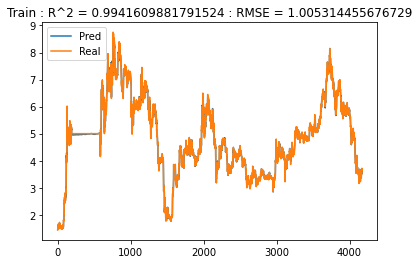

In [220]:
import matplotlib.pyplot as plt

a = []

for i in range(len(X_train)):
    test = loaded_model.predict([X_train[i]])
    a.append(test[0])
plt.plot(a, label='Pred')
plt.plot(y_train, label='Real')

R2 = loaded_model.score(X_train, y_train)
rmse = RMSE(y_train, a)
plt.title('Train : R^2 = ' + str(R2) + ' : RMSE = ' + str(rmse))

plt.legend()
plt.show()

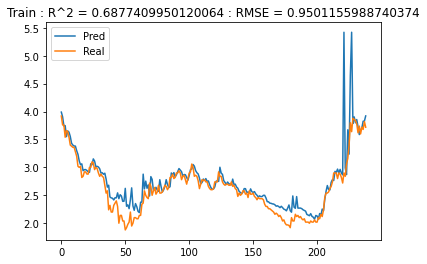

In [221]:
import matplotlib.pyplot as plt

a = []

for i in range(len(X_test)):
    test = loaded_model.predict([X_test[i]])
    a.append(test[0])
plt.plot(a, label='Pred')
plt.plot(y_test, label='Real')

R2 = loaded_model.score(X_test, y_test)
rmse = RMSE(y_test, a)
plt.title('Test : R^2 = ' + str(R2) + ' : RMSE = ' + str(rmse))

plt.legend()
plt.show()

In [25]:
# print(len(X_train))
counter = 0
for i in range(len(X_test)):
    test = loaded_model.predict([X_test[i]])
    if test[0] == y_test[i]:
        counter += 1
print('Accuracy : ' + str(counter / len(X_test)))

Accuracy : 0.0


In [27]:
TPos = 0 # ทายว่าขึ้น และขึ้น
TNeg = 0 # ทายว่าลง และลง
FPos = 0 # ทายว่าลง แต่ขึ้น
FNeg = 0 # ทายว่าขึ้น แต่ลง

for i in range(1,len(X_test)):
    test = loaded_model.predict([X_test[i]])
    # TPos
    if (test[0] >= y_test[i-1]) and (y_test[i] >= y_test[i-1]):
        TPos += 1
    # TNeg
    if (test[0] <= y_test[i-1]) and (y_test[i] <= y_test[i-1]):
        TNeg += 1
    # FPos
    if (test[0] < y_test[i-1]) and (y_test[i] > y_test[i-1]):
        FPos += 1
    # FNeg
    if (test[0] > y_test[i-1]) and (y_test[i] < y_test[i-1]):
        FNeg += 1

print('TPos = ' + str(TPos/(len(X_test)-1))) 
print('TNeg = ' + str(TNeg/(len(X_test)-1))) 
print('TPos + TNeg = ' + str((TPos+TNeg)/(len(X_test)-1))) 
print()
print('FPos = ' + str(FPos/(len(X_test)-1))) 
print('FNeg = ' + str(FNeg/(len(X_test)-1))) 
print('FPos + FNeg = ' + str((FPos+FNeg)/(len(X_test)-1)))

TPos = 0.2773109243697479
TNeg = 0.2773109243697479
TPos + TNeg = 0.5546218487394958

FPos = 0.21428571428571427
FNeg = 0.23109243697478993
FPos + FNeg = 0.44537815126050423


In [28]:
a = [1,2,3]
b = [1,2,3]
print(a-b)

TypeError: unsupported operand type(s) for -: 'list' and 'list'